<a href="https://colab.research.google.com/github/pritam605/sql_learnings/blob/main/SQL_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
select name
FROM Customer
Where
    --referee_id <> 2 or referee_id is null
    --coalesce(refree_id,'') != 2  -- Although Coalesce is used to replace Null with empty string and we can do that here and then check if any empty strings or non 2 numbers shouldn't match but problem is that coalesce only works with strings and here refree_id is an integer so it won't replace and null remains null.
    referee_id != 2 is not false -- This works fine because When you're having trouble with nulls, for simple cases you can often just tack on "is not false" to your condition and get the result you want. Of course, you should understand what this means and how null logic works in SQL, but for simple conditions this is usually what you want. ;

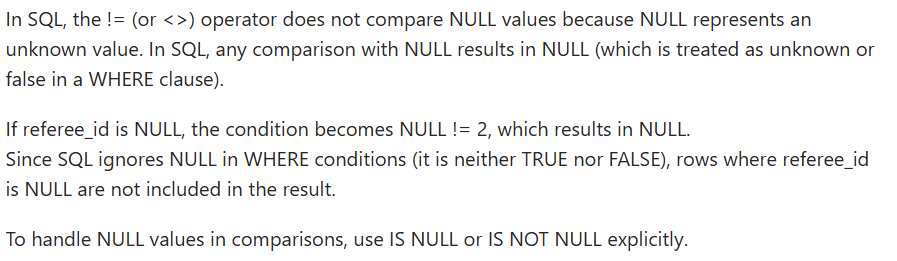

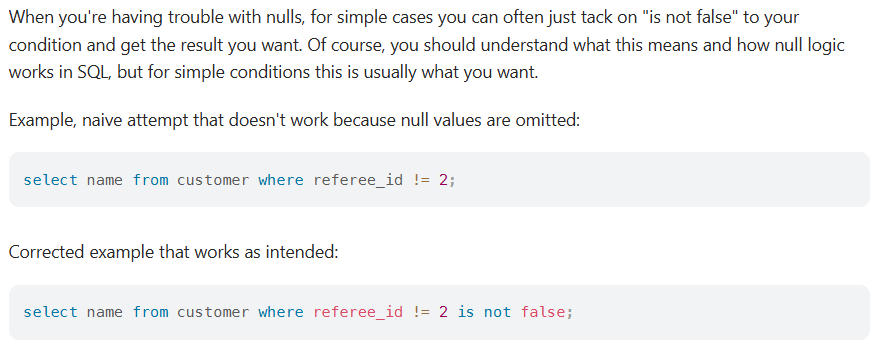

In [ ]:
# Question 3
'''
name is the primary key (column with unique values) for this table.
Each row of this table gives information about the name of a country, the continent to which it belongs, its area, the population, and its GDP value.


A country is big if:

it has an area of at least three million (i.e., 3000000 km2), or
it has a population of at least twenty-five million (i.e., 25000000).
Write a solution to find the name, population, and area of the big countries.

Return the result table in any order.
'''
#Solution

select name, population, area
FROM World
where area >= 3000000 or population >= 25000000


## Python equivalent
import pandas as pd

def big_countries(world: pd.DataFrame) -> pd.DataFrame:
    df = world[(world['area'] >= 3000000) | (world['population'] >= 25000000)]
    return df[['name', 'population', 'area']]

In [ ]:
Q4
'''
There is no primary key (column with unique values) for this table, the table may have duplicate rows.
Each row of this table indicates that some viewer viewed an article (written by some author) on some date.
Note that equal author_id and viewer_id indicate the same person.
Write a solution to find all the authors that viewed at least one of their own articles.
Return the result table sorted by id in ascending order.
'''
#Solution

select a.author_id as id from (
select
    author_id, viewer_id, count(*)
from Views
group by 1,2 having author_id = viewer_id
) a order by 1


Alternatively -
select distinct(author_id) as id from views where author_id=viewer_id order by author_id;